In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('/kaggle/input/2023-09-06-owid-democracies-vs-autocracies/countries-democracies-autocracies-row.csv')

# Output the column names and their data types
print(df.dtypes)

Entity                       object
Code                         object
Year                          int64
number_closedaut_row_owid     int64
number_electaut_row_owid      int64
number_electdem_row_owid      int64
number_libdem_row_owid        int64
dtype: object


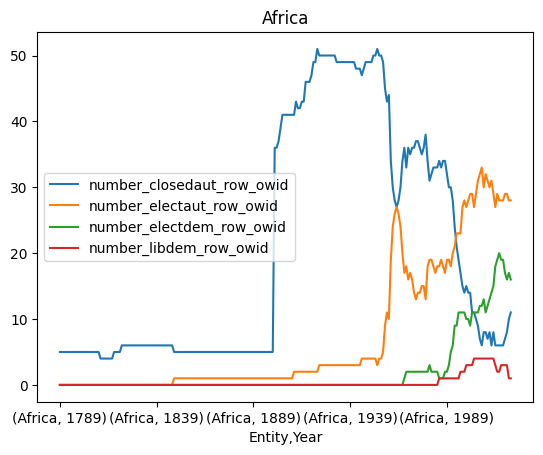

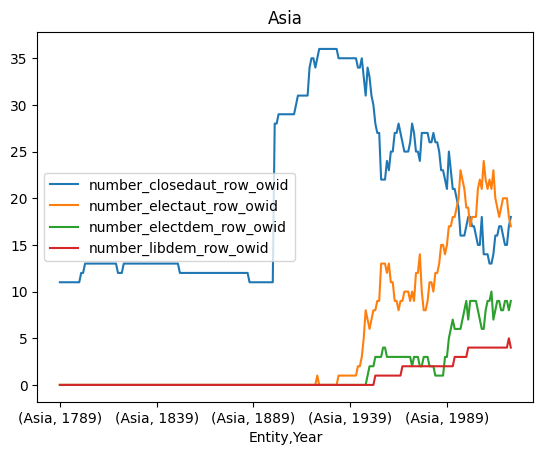

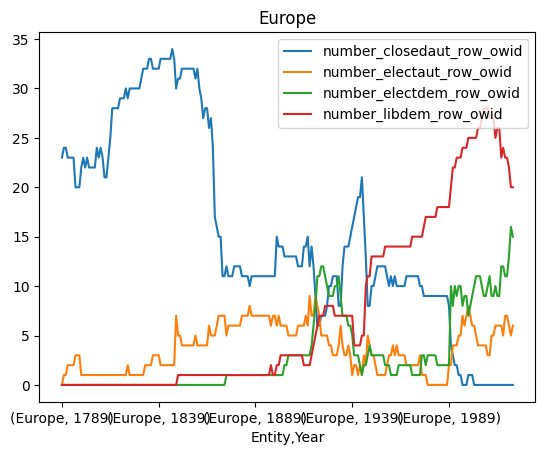

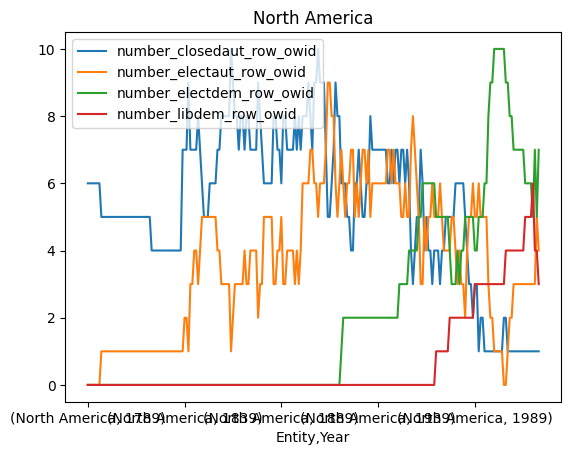

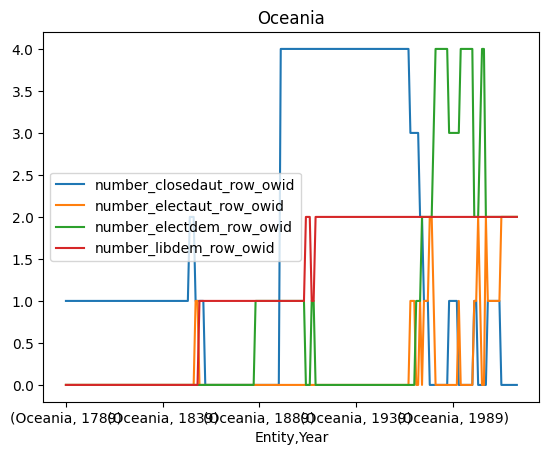

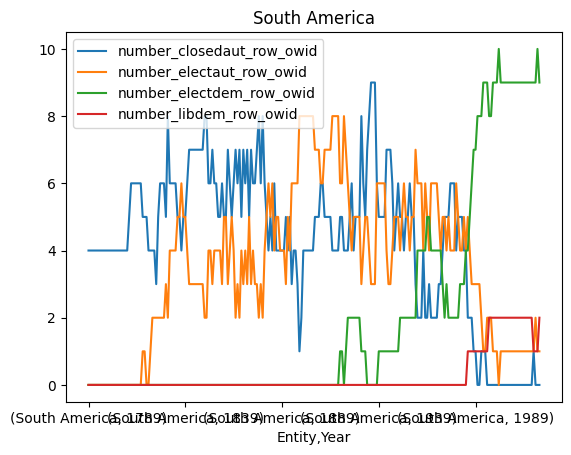

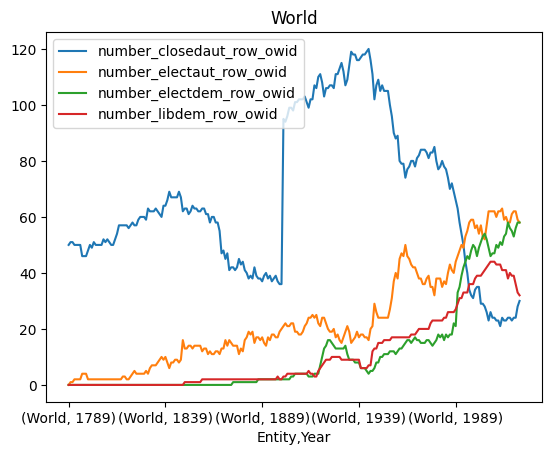

In [2]:
import matplotlib.pyplot as plt

# Group the data by continent and year
grouped = df.groupby(['Entity', 'Year'])

df['Code'] = pd.to_numeric(df['Code'], errors='coerce')

# Calculate the mean number of countries with each form of government for each continent and year
means = grouped.mean()

# Create a line plot for each continent
for continent, data in means.groupby('Entity'):
    data.plot(y=['number_closedaut_row_owid', 'number_electaut_row_owid', 'number_electdem_row_owid', 'number_libdem_row_owid'], title=continent)

# Show the plots
plt.show()


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

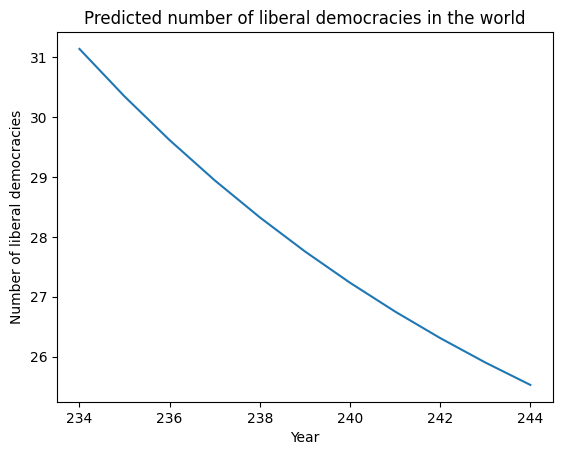

In [3]:
from statsmodels.tsa.arima.model import ARIMA

# Filter the data for the "world" entity group
world_data = df[df['Entity'] == 'World']

# Output the top 10 lines of the DataFrames
#print(df.head(10))
#print(world_data.head(10))

# Fit an ARIMA model
model = ARIMA(world_data['number_libdem_row_owid'], order=(1, 1, 1))
model_fit = model.fit()

# Make predictions for the next 10 years
predictions = model_fit.predict(start=len(world_data), end=len(world_data)+10)

# Plot the predictions
plt.plot(predictions)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of liberal democracies')
plt.title('Predicted number of liberal democracies in the world')

# Show the plot
plt.show()
